## Maratona de Filmes

##### Ivan Barros

Você quer passar um final de semana assistindo ao máximo de filmes possível, mas há restrições quanto aos horários disponíveis e ao número de títulos que podem ser vistos em cada categoria (comédia, drama, ação, etc).

Entrada: Um inteiro N representando o número de filmes disponíveis para assistir e N trios de inteiros (H[i], F[i], C[i]), representando a hora de início, a hora de fim e a categoria do i-ésimo filme. Além disso, um inteiro M representando o número de categorias e uma lista de M inteiros representando o número máximo de filmes que podem ser assistidos em cada categoria.

Saída: Um inteiro representando o número máximo de filmes que podem ser assistidos de acordo com as restrições de horários e número máximo por categoria.

### Heurística Gulosa

Um algoritmo guloso é qualquer algoritmo que segue a heurística de resolução de problemas de fazer a escolha localmente ótima em cada estágio. Em muitos problemas, uma estratégia gulosa não produz uma solução ótima, mas uma heurística gulosa pode produzir soluções ótimas localmente que se aproximam de uma solução ótima global em um período de tempo razoável.

Por exemplo, uma estratégia gulosa para o problema do caixeiro viajante (que é de alta complexidade computacional) é a seguinte heurística: "A cada passo da jornada, visite a cidade não visitada mais próxima". Esta heurística não pretende encontrar a melhor solução, mas termina em um número razoável de passos; encontrar uma solução ótima para um problema tão complexo normalmente requer muitos passos excessivos. Na otimização matemática, os algoritmos gananciosos resolvem problemas combinatórios com propriedades de matróides e fornecem aproximações de fator constante para problemas de otimização com a estrutura submodular.


### Aleatoriedade

Um gerador de números pseudo-aleatórios (RNG) é um algoritmo determinístico que gera uma sequência de números que parece aleatória. 

- determinístico: Um RNG tipicamente recebe como entrada um inteiro seed (que representa uma sequência de bits "aleatória") e gera uma sequência de números baseada no seed. Ou seja, o algoritmo é determinístico pois gera sempre a mesma sequência para uma determinada entrada (seed).


## Implementação dos Algoritmos

### Guloso

A entrada é lida do usuário, onde a primeira linha contém dois inteiros n e m, que correspondem ao número total de filmes e o número de categorias, respectivamente. A próxima linha contém m inteiros, correspondendo ao número máximo de filmes que podem ser escolhidos para cada categoria. As próximas n linhas contêm informações sobre os filmes, cada uma contendo três inteiros: o tempo de início, o tempo de término e a categoria do filme.

Os filmes são ordenados pelo tempo de término e, em seguida, são iterados um por um. Para cada filme, é verificado se ainda existem vagas disponíveis na categoria correspondente e se o filme é compatível com os filmes já selecionados (ou seja, se o horário do filme não coincide com o horário dos filmes selecionados até o momento). Se essas condições forem satisfeitas, o filme é adicionado à lista de filmes selecionados e o horário do filme é marcado como ocupado. O processo é repetido para cada filme até que todas as categorias tenham atingido seu limite de seleção.

#### Parte 1

Nessa etapa, é definida a estrutura Movie, que contém informações sobre um filme, como id, start_time, end_time, category e schedule. Além disso, são definidas duas funções auxiliares: compare_movie e generate_schedule.

A função compare_movie é usada para ordenar os filmes em ordem crescente de tempo de término, ou seja, os filmes mais cedo terminam primeiro.

A função generate_schedule gera uma representação bit a bit de um intervalo de tempo, representando as horas em que um filme está sendo exibido. Essa representação é armazenada em um objeto bitset<24> para que cada bit corresponda a uma hora do dia. A função define todos os bits correspondentes às horas em que o filme está sendo exibido como 1.

In [7]:
#include <iostream>
#include <vector>
#include <algorithm>
#include <iomanip>
#include <bitset>

using namespace std;

struct Movie {
    int id;
    int start_time;
    int end_time;
    int category;
    std::bitset<24> schedule;
};

bool compare_movie(Movie a, Movie b) {
    return a.end_time < b.end_time;
}

std::bitset<24> generate_schedule(int start, int end) {
    std::bitset<24> schedule;

    if (start == end) {
        schedule.set(start);
        return schedule;
    }
    
    for (int i = start; i < end; i++) {
        schedule.set(i);
    }

    return schedule;
}

SyntaxError: invalid syntax (2418158565.py, line 7)

#### Parte 2

Nessa etapa estão definidas as funções que realizam a seleção dos filmes para o maratona de cinema utilizando uma heurística gulosa. As funções são as seguintes:

   - select_movies: essa função recebe um vetor de filmes, um vetor de categorias, um vetor de números de filmes por categoria e um inteiro indicando a disponibilidade da maratona de cinema. Ela percorre todos os filmes, verificando se a categoria do filme tem ainda disponibilidade para seleção e se o horário do filme é compatível com a disponibilidade da maratona. Caso as condições sejam satisfeitas, o filme é adicionado à maratona.
   - is_compatible_with_marathon: essa função recebe um bitset que representa o horário do filme e um inteiro que representa a disponibilidade da maratona. Ela verifica se há conflito de horários entre o filme e a maratona. Se não houver conflito, a função retorna true.
   - add_movie_to_marathon: essa função recebe um filme, sua categoria, o vetor de números de filmes por categoria, a disponibilidade da maratona e o vetor de categorias selecionadas para a maratona. Ela adiciona o filme à maratona, atualizando a disponibilidade da maratona e a quantidade de filmes disponíveis para a categoria correspondente do filme.
   - print_selected_movies: essa função recebe o vetor de filmes selecionados para a maratona, o vetor de categorias correspondentes a cada filme e o número total de filmes selecionados. Ela imprime o número total de filmes selecionados, seguido das informações de cada filme selecionado (id, horário de início, horário de término e categoria).
   - greedy_heuristic: essa função recebe um vetor de filmes, um vetor de categorias, um vetor de números de filmes por categoria e um inteiro indicando a disponibilidade da maratona de cinema. Ela chama a função select_movies, que seleciona os filmes para a maratona de acordo com a heurística gulosa, e depois chama a função print_selected_movies, que imprime as informações dos filmes selecionados.

In [ ]:
vector<Movie> read_movies(int num_movies);

void select_movies(vector<Movie>& movies, vector<int>& categories, vector<int>& num_movies, int& marathon_availability);

bool is_compatible_with_marathon(const std::bitset<24>& schedule, const int marathon_availability);

void add_movie_to_marathon(const Movie& movie, const int category, vector<int>& num_movies, int& marathon_availability, vector<int>& categories);

void print_selected_movies(const vector<Movie>& movies, const vector<int>& categories, const int num_selected_movies);

void greedy_heuristic(vector<Movie>& movies, vector<int>& categories, vector<int>& num_movies, int& marathon_availability);


void select_movies(vector<Movie>& movies, vector<int>& categories, vector<int>& num_movies, int& marathon_availability) {
    const int num_movies_total = movies.size();

    for (int i = 0; i < num_movies_total; i++) {
        const Movie& movie = movies[i];
        const int category = movie.category;
        const std::bitset<24> schedule = movie.schedule;

        if (num_movies[category - 1] == 0) {
            continue;
        }

        if (marathon_availability == 0 || is_compatible_with_marathon(schedule, marathon_availability)) {
            add_movie_to_marathon(movie, category, num_movies, marathon_availability, categories);
        }
    }
}

bool is_compatible_with_marathon(const std::bitset<24>& schedule, const int marathon_availability) {
    const std::bitset<24> temp_schedule(marathon_availability);
    const std::bitset<24> intersection = temp_schedule & schedule;
    return intersection.none();
}

void add_movie_to_marathon(const Movie& movie, const int category, vector<int>& num_movies, int& marathon_availability, vector<int>& categories) {
    marathon_availability |= movie.schedule.to_ulong();
    categories.push_back(category);
    num_movies[category - 1]--;
}

void print_selected_movies(const vector<Movie>& movies, const vector<int>& categories, const int num_selected_movies) {
    cout << num_selected_movies << endl;

    for (int i = 0; i < num_selected_movies; i++) {
        const Movie& movie = movies[i];
        cout << movie.id << " " << movie.start_time << " " << movie.end_time << " " << categories[i] << endl;
    }
}

void greedy_heuristic(vector<Movie>& movies, vector<int>& categories, vector<int>& num_movies, int& marathon_availability) {
    select_movies(movies, categories, num_movies, marathon_availability);
    const int num_selected_movies = categories.size();
    print_selected_movies(movies, categories, num_selected_movies);
}

vector<Movie> read_movies(int num_movies) {
    vector<Movie> movies;

    for (int i = 0; i < num_movies; i++) {
        int start_time, end_time, category;
        cin >> start_time >> end_time >> category;

        if (start_time > end_time) {
            if (end_time == 0) {
                end_time = 24;
            } else if (start_time == -1 || end_time == -1) {
                continue;
            } else {
                continue;
            }
        }

        Movie movie;
        movie.id = i + 1;
        movie.start_time = start_time;
        movie.end_time = end_time;
        movie.category = category;
        movie.schedule = generate_schedule(start_time, end_time);

        movies.push_back(movie);
    }

    sort(movies.begin(), movies.end(), compare_movie);

    return movies;
}

#### Parte 3

Nesta parte do código, a função main é definida e executada. Dentro desta função, as seguintes etapas são executadas:

   - O número de filmes e o número de categorias são lidos da entrada padrão através da função cin >> n >> m;.
   - Em seguida, o número de filmes para cada categoria é lido e armazenado em um vetor chamado num_movies através de um loop for: for (int i = 0; i < m; i++) { cin >> num_movies[i]; }
   - Os filmes são lidos da entrada padrão e armazenados em um vetor chamado movies usando a função read_movies.
   - Um vetor vazio chamado categories e uma variável inteira marathon_availability são inicializados.
   - A função greedy_heuristic é chamada com os argumentos movies, categories, num_movies e marathon_availability. Esta função implementa a heurística gulosa para selecionar os filmes para o festival.
   - O programa retorna 0 e encerra.

In [ ]:

int main() {
    int n, m;
    cin >> n >> m;

    vector<int> num_movies(m);
    for (int i = 0; i < m; i++) {
        cin >> num_movies[i];
    }

    vector<Movie> movies = read_movies(n);

    vector<int> categories;
    int marathon_availability = 0;

    greedy_heuristic(movies, categories, num_movies, marathon_availability);

    return 0;
}

### Aleatório

#### Parte 1

Nesta primeira parte do código, temos a inclusão de bibliotecas, a definição de uma estrutura Movie, que representa um filme com seu id, hora de início e término, categoria e um bitset de 24 bits para representar sua programação no horário do dia.

Em seguida, temos a definição da função compare_movie, que recebe duas estruturas Movie como parâmetros e retorna true se o filme a termina antes do filme b. Isso será usado posteriormente para ordenar a lista de filmes.

Também temos a definição da função generate_schedule, que recebe a hora de início e fim de um filme e retorna um bitset de 24 bits para representar sua programação no horário do dia.

Há, além disso, a criação de um gerador de números aleatórios que definem uma distribuição uniforme de inteiros entre -2 e 5. Elas são usadas posteriormente no código.

In [ ]:
#include <iostream>
#include <vector>
#include <algorithm>
#include <iomanip>
#include <bitset>
#include <random>

using namespace std;
std::default_random_engine generator;
std::uniform_int_distribution<int> distribution(-2,5);

struct Movie {
    int id;
    int start_time;
    int end_time;
    int category;
    std::bitset<24> schedule;
};

bool compare_movie(Movie a, Movie b) {
    return a.end_time < b.end_time;
}

std::bitset<24> generate_schedule(int start, int end) {
    std::bitset<24> schedule;

    if (start == end) {
        schedule.set(start);
        return schedule;
    }
    
    for (int i = start; i < end; i++) {
        schedule.set(i);
    }

    return schedule;
}


#### Parte 2

Essa parte do código implementa a heurística aleatória para selecionar os filmes para a maratona. A função random_heuristic é a função principal que chama outras funções auxiliares para selecionar os filmes aleatoriamente.

A função select_movies é responsável por iterar sobre todos os filmes e selecionar um subconjunto aleatório de filmes para o festival. Essa função usa uma distribuição uniforme para gerar números aleatórios e decide se um determinado filme deve ser adicionado ao festival ou não com base no número gerado aleatoriamente. A função também verifica se um filme é compatível com o horário do festival de cinema antes de adicioná-lo.

A função is_compatible_with_marathon verifica se um filme pode ser adicionado ao horário do festival, sem conflitos com os outros filmes selecionados. Essa verificação é feita usando a operação & para verificar se há interseção entre os horários dos filmes selecionados e o horário do filme atual.

A função add_movie_to_marathon adiciona o filme selecionado ao festival de cinema e atualiza o horário do festival e as informações sobre o número de filmes de cada categoria.

A função print_selected_movies imprime os filmes selecionados com seus respectivos detalhes (id, horário de início e término e categoria).

A função "read_movies" lê informações de "num_movies" filmes a partir da entrada padrão (cin) e os armazena em um vetor de objetos "Movie". As informações lidas incluem o tempo de início, tempo de término e categoria de cada filme. Se o tempo de início for maior que o tempo de término, o tempo de término é ajustado para 24 se o tempo de término for 0 ou o filme é ignorado se o tempo de início ou tempo de término for -1. A função também gera um horário de exibição para cada filme usando a função "generate_schedule". Os filmes são classificados em ordem crescente de tempo de início antes de serem retornados como o vetor "movies".

In [ ]:
vector<Movie> read_movies(int num_movies);

void select_movies(vector<Movie>& movies, vector<int>& categories, vector<int>& num_movies, int& marathon_availability);

bool is_compatible_with_marathon(const std::bitset<24>& schedule, const int marathon_availability);

void add_movie_to_marathon(const Movie& movie, const int category, vector<int>& num_movies, int& marathon_availability, vector<int>& categories);

void print_selected_movies(const vector<Movie>& movies, const vector<int>& categories, const int num_selected_movies);

void random_heuristic(vector<Movie>& movies, vector<int>& categories, vector<int>& num_movies, int& marathon_availability);


void select_movies(vector<Movie>& movies, vector<int>& categories, vector<int>& num_movies, int& marathon_availability) {
    const int num_movies_total = movies.size();
    std::default_random_engine rng(10);
    std::uniform_real_distribution<double> dist(0.0, 1.0);

    for (int i = 0; i < num_movies_total; i++) {
        double random_number = dist(rng);
        const Movie& movie = movies[i];
        const int category = movie.category;
        const std::bitset<24> schedule = movie.schedule;

        if (num_movies[category - 1] == 0) {
            continue;
        }

        if (random_number <= 0.25) {
            add_movie_to_marathon(movie, category, num_movies, marathon_availability, categories);
        } else if (marathon_availability == 0 || is_compatible_with_marathon(schedule, marathon_availability)) {
            add_movie_to_marathon(movie, category, num_movies, marathon_availability, categories);
        }
    }
}


bool is_compatible_with_marathon(const std::bitset<24>& schedule, const int marathon_availability) {
    const std::bitset<24> temp_schedule(marathon_availability);
    const std::bitset<24> intersection = temp_schedule & schedule;
    return intersection.none();
}

void add_movie_to_marathon(const Movie& movie, const int category, vector<int>& num_movies, int& marathon_availability, vector<int>& categories) {
    marathon_availability |= movie.schedule.to_ulong();
    categories.push_back(category);
    num_movies[category - 1]--;
}

void print_selected_movies(const vector<Movie>& movies, const vector<int>& categories, const int num_selected_movies) {
    cout << num_selected_movies << endl;

    for (int i = 0; i < num_selected_movies; i++) {
        const Movie& movie = movies[i];
        cout << movie.id << " " << movie.start_time << " " << movie.end_time << " " << categories[i] << endl;
    }
}

void random_heuristic(vector<Movie>& movies, vector<int>& categories, vector<int>& num_movies, int& marathon_availability) {
    select_movies(movies, categories, num_movies, marathon_availability);
    const int num_selected_movies = categories.size();
    print_selected_movies(movies, categories, num_selected_movies);
}

vector<Movie> read_movies(int num_movies) {
    vector<Movie> movies;

    for (int i = 0; i < num_movies; i++) {
        int start_time, end_time, category;
        cin >> start_time >> end_time >> category;

        if (start_time > end_time) {
            if (end_time == 0) {
                end_time = 24;
            } else if (start_time == -1 || end_time == -1) {
                continue;
            } else {
                continue;
            }
        }

        Movie movie;
        movie.id = i + 1;
        movie.start_time = start_time;
        movie.end_time = end_time;
        movie.category = category;
        movie.schedule = generate_schedule(start_time, end_time);

        movies.push_back(movie);
    }

    sort(movies.begin(), movies.end(), compare_movie);

    return movies;
}


#### Parte 3

Neste trecho de código, o programa principal (função main()) solicita ao usuário o número total de filmes n e o número de categorias m existentes. Em seguida, ele lê a quantidade de filmes em cada categoria e armazena esses valores em um vetor num_movies. Depois, a função read_movies() é chamada para ler os detalhes de cada filme e armazená-los em um vetor movies, que é ordenado pela hora de início dos filmes.

A seguir, são criados um vetor vazio categories para armazenar as categorias dos filmes selecionados e uma variável marathon_availability inicializada com zero, que será usada para controlar a disponibilidade de horários para maratonas de filmes. Por fim, a função random_heuristic() é chamada com os argumentos movies, categories, num_movies e marathon_availability para selecionar uma lista de filmes com base na heurística aleatória implementada. O programa retorna 0 quando a função main() é encerrada.

In [ ]:
int main() {
    int n, m;
    cin >> n >> m;

    vector<int> num_movies(m);
    for (int i = 0; i < m; i++) {
        cin >> num_movies[i];
    }

    vector<Movie> movies = read_movies(n);

    vector<int> categories;
    int marathon_availability = 0;

    random_heuristic(movies, categories, num_movies, marathon_availability);

    return 0;
}



## Output Gerado

O arquivo .txt gerado na saída do programa tem o seguinte formato:
 - Linha 1: Quantidade n de filmes ajustados para a situação
 - Linhas 2 a n+1: id dos filmes escolhidos, juntamente com sua categoria

Exemplo de arquivo gerado na saída:

~~~javascript
24
1215 2
2427 4
2256 3
9419 1
1783 5
5382 3
7192 5
6915 6
9276 7
8657 3
2230 3
7821 4
672 7
3193 7
543 7
2722 4
1343 4
1469 4
9240 3
4585 3
4040 6
1732 6
2959 4
7711 6

~~~

## Profiling

É preciso realizar uma análise de um programa durante sua execução, de modo a determinar seu consumo de memória e/ou tempo de execução

Com profiling, podemos responder duas importantes perguntas:
 - Onde o programa consome mais recursos?
 - Onde devo concentrar meus esforços de otimização?

Vamos fazer uso da ferramenta Valgrind para realizar o profiling desse código e entender esses pontos relacionados ao programa

### Gulosa

In [ ]:
!valgrind --tool=callgrind ./greedy <input_valgrind.txt > greedy_valgrind_output.txt

==914869== Callgrind, a call-graph generating cache profiler
==914869== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==914869== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
==914869== Command: ./greedy
==914869== 
==914869== For interactive control, run 'callgrind_control -h'.
--914869-- WARNING: Serious error when reading debug info
--914869-- When reading debug info from /home/user/supercomp/supercomp/material/projetos/projeto-ivan/greedy:
--914869-- Ignoring non-Dwarf2/3/4 block in .debug_info
./greedy: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by ./greedy)
==914869== 
==914869== Events    : Ir
==914869== Collected : 75930
==914869== 
==914869== I   refs:      75,930


Com isso, encontramos o valor de PID= 9576 e podemos executar o codigo:

In [ ]:
!callgrind_annotate callgrind.out.914869 greedy.cpp 

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.914869' (creator: callgrind-3.15.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 18516
Trigger: Program termination
Profiled target:  ./greedy (PID 914869, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   greedy.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
Ir     
--------------------------------------------------------------------------------
75,930  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir      file:function
--------------------------------------------------------------------------------
15,710  /build/glibc-SzIz7B/glibc-2.31/elf/dl-tunables.c:__GI___tunables_init [/usr/lib/x86_6

### Aleatoria

In [ ]:
!valgrind --tool=callgrind ./randomization <input_valgrind.txt > random_valgrind_output.txt

==914933== Callgrind, a call-graph generating cache profiler
==914933== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==914933== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
==914933== Command: ./randomization
==914933== 
==914933== For interactive control, run 'callgrind_control -h'.
--914933-- WARNING: Serious error when reading debug info
--914933-- When reading debug info from /home/user/supercomp/supercomp/material/projetos/projeto-ivan/randomization:
--914933-- Ignoring non-Dwarf2/3/4 block in .debug_info
./randomization: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by ./randomization)
==914933== 
==914933== Events    : Ir
==914933== Collected : 75930
==914933== 
==914933== I   refs:      75,930


Com isso, encontramos o valor de PID= 11117 e podemos executar o codigo:

In [ ]:
!callgrind_annotate callgrind.out.914933 randomization.cpp 

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.914933' (creator: callgrind-3.15.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 18516
Trigger: Program termination
Profiled target:  ./randomization (PID 914933, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   randomization.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
Ir     
--------------------------------------------------------------------------------
75,930  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir      file:function
--------------------------------------------------------------------------------
15,710  /build/glibc-SzIz7B/glibc-2.31/elf/dl-tunables.c:__GI___tunables_init [

### Takeaways

Ao analisar o desempenho dos programas, é possível destacar que ambos apresentam problemas de vazamento de memória devido à falta de desalocação de recursos. No entanto, o programa que utiliza a estratégia aleatória apresenta ainda mais questões relacionadas à alocação e liberação de memória, com diversas chamadas repetitivas a funções específicas. É preciso otimizar essas chamadas para melhorar a performance desse programa.

Outra questão que precisa ser abordada em ambos os programas é a alocação dinâmica de memória, que pode ser otimizada.

Ao analisar o desempenho do programa aleatório, foi identificado que o loop que cria uma lista apenas com filmes disponíveis no horário atual consome muitos recursos, embora seja uma opção melhor do que procurar um filme aleatoriamente. É necessário comparar mais casos para buscar melhorias nesse aspecto.

Por outro lado, no programa guloso, há diversas melhorias possíveis, incluindo a alocação dinâmica de memória e a redução no número de alocações e liberações de recursos.

Vale ressaltar que em todas as análises realizadas, foi observada uma grande quantidade de chamadas às funções de cin e cout, que realizam diversas requisições de instruções por linha de código. Isso compromete a eficiência do programa, visto que estradas e saídas são extremamente custosas (como vimos em aula)

## comparando desempenhos

Os arquivos de input utilizados são do formato input_n_m em que n e m são o número de filmes e o número de categorias, respectivamente. 

- n varia entre 10000 e 10000000 
- m varia entre 2 e 10

### Compilando

Exemplo de compilação

In [ ]:
 g++ -Wall -O3 -g greedy.cpp -o greedy

### Executando

Exemplo de execução

In [ ]:
./greedy < input_files1/input_10000_100.txt > /output_files1/greedy_output_10000_100.txt

## Comparação de resultados

## Primeiro passo: número de categorias constante

### Utilizaremos um número constante (100) de categorias. Os arquivos estão presentes na pasta input_files1

O código abaixo é responsável por testar o desempenho de dois algoritmos diferentes - "greedy" e "randomization" - em diferentes arquivos de entrada com diferentes tamanhos de dados. O objetivo é comparar o tempo de execução e o consumo de memória dos dois algoritmos em diferentes cenários.

O código cria uma estrutura de dados em forma de dicionário que armazena os resultados de cada teste. Para cada algoritmo e arquivo de entrada, o código executa o algoritmo dez vezes e mede o tempo de execução e o consumo de memória para cada execução. Os resultados são armazenados no dicionário criado anteriormente para posterior análise.

O código usa a biblioteca pandas para criar um dataframe que organiza os resultados em uma tabela e a biblioteca matplotlib para plotar gráficos que mostram a comparação de desempenho entre os dois algoritmos em diferentes cenários.

In [2]:
import time
import subprocess

algorithms = ['greedy', 'randomization']
file_sizes = ['input_1000_100.txt', 'input_10000_100.txt', 'input_100000_100.txt', 'input_1000000_100.txt', 'input_10000000_100.txt', 'input_100000000_100.txt']

data = {algo: {file: {'tempo': [], 'memoria': []} for file in file_sizes} for algo in algorithms}

def number_of_movies(file):
    with open(file, 'r') as f:
        line = f.readline().split()
        return int(line[0])
    
for algorithm, files in data.items():
    for file_name, measurements in files.items():
        for i in range(10):
            print(f"{algorithm} - {file_name} - {i+1}/10")
            output_name = f"{i}_{file_name.split('.')[0]}"
            start_time = time.time()
            subprocess.run(f'./{algorithm} < input_files1/{file_name} > output_files1/{algorithm}_output_{output_name}', shell=True)
            #!./{algorithm} < input_files1/{file_name} > output_files1/{algorithm}_output_{output_name}
            end_time = time.time() - start_time
            print(f"\tTime: {end_time}")
            measurements["tempo"].append(end_time)
            measurements["memoria"].append(number_of_movies(f"output_files1/{algorithm}_output_{output_name}"))

greedy - input_1000_100.txt - 1/10
	Time: 0.003223896026611328
greedy - input_1000_100.txt - 2/10
	Time: 0.0038864612579345703
greedy - input_1000_100.txt - 3/10
	Time: 0.00408482551574707
greedy - input_1000_100.txt - 4/10
	Time: 0.0034334659576416016
greedy - input_1000_100.txt - 5/10
	Time: 0.003042459487915039
greedy - input_1000_100.txt - 6/10
	Time: 0.0026426315307617188
greedy - input_1000_100.txt - 7/10
	Time: 0.0030176639556884766
greedy - input_1000_100.txt - 8/10
	Time: 0.0028014183044433594
greedy - input_1000_100.txt - 9/10
	Time: 0.002522706985473633
greedy - input_1000_100.txt - 10/10
	Time: 0.0025453567504882812
greedy - input_10000_100.txt - 1/10
	Time: 0.019118070602416992
greedy - input_10000_100.txt - 2/10
	Time: 0.041779279708862305
greedy - input_10000_100.txt - 3/10
	Time: 0.013994216918945312
greedy - input_10000_100.txt - 4/10
	Time: 0.016854524612426758
greedy - input_10000_100.txt - 5/10
	Time: 0.010360240936279297
greedy - input_10000_100.txt - 6/10
	Time: 0

Agora salvaremos o resultado em um json

In [3]:
import json

with open('data.json', 'w') as fp:
    json.dump(json.dumps(data, indent=2), fp)

Gerando o DataFrame para ser utilizado no gráfico

In [4]:
import pandas as pd

df = pd.DataFrame(columns=['algorithm', 'file', 'iteration', 'tempo', 'memoria'])

for algorithm in data:
    for arquivo in data[algorithm]:
        for i in range(10):
            df = pd.concat([df, pd.DataFrame({
                'algorithm': [algorithm],
                'file': [arquivo],
                'iteration': [i+1],
                'tempo': [data[algorithm][arquivo]['tempo'][i]],
                'memoria': [data[algorithm][arquivo]['memoria'][i]]
            })])

df

,algorithm,file,iteration,tempo,memoria
0,greedy,input_1000_100.txt,1,0.003224,24
0,greedy,input_1000_100.txt,2,0.003886,24
0,greedy,input_1000_100.txt,3,0.004085,24
0,greedy,input_1000_100.txt,4,0.003433,24
0,greedy,input_1000_100.txt,5,0.003042,24
...,...,...,...,...,...
0,randomization,input_100000000_100.txt,6,98.094736,4254
0,randomization,input_100000000_100.txt,7,100.469745,4254
0,randomization,input_100000000_100.txt,8,100.003710,4254
0,randomization,input_100000000_100.txt,9,98.472099,4254


In [5]:
df.to_csv('data.csv', index=False)

### Gŕafico de tempo

In [6]:
df_mean = df.groupby(['algorithm', 'file']).mean(numeric_only=True).reset_index()
df_mean.sort_values(by=['tempo'], inplace=True)


In [7]:
df_mean

,algorithm,file,tempo
11,randomization,input_1000_100.txt,0.002714
5,greedy,input_1000_100.txt,0.003120
10,randomization,input_10000_100.txt,0.013426
4,greedy,input_10000_100.txt,0.015466
3,greedy,input_100000_100.txt,0.088464
9,randomization,input_100000_100.txt,0.090434
2,greedy,input_1000000_100.txt,0.894787
8,randomization,input_1000000_100.txt,0.910214
1,greedy,input_10000000_100.txt,9.404404
7,randomization,input_10000000_100.txt,9.524863


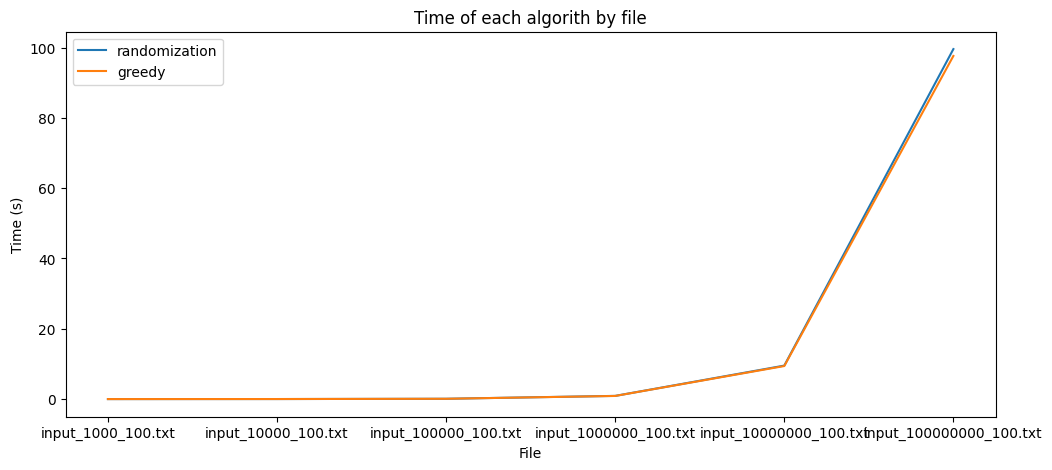

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))
for algorithm in df_mean['algorithm'].unique():
    df_aux = df_mean[df_mean['algorithm'] == algorithm]
    ax.plot(df_aux['file'], df_aux['tempo'], label=algorithm)

ax.set_title('Time of each algorith by file')
ax.set_xlabel('File')
ax.set_ylabel('Time (s)')
ax.legend()
plt.show()

Embora apresentem abordagens diferentes, esses algoritmos podem apresentar tempos de execução bastante próximos, especialmente quando se trata de inputs relativamente pequenos, pois não há muitas variações a serem exploradas. No entanto, à medida que o tamanho do input aumenta, a heurística gulosa tende a se tornar mais lenta em relação à abordagem aleatorizada.

Isso ocorre porque, à medida que o input aumenta, a heurística gulosa pode ficar presa em soluções locais ótimas, sem conseguir explorar outras alternativas que possam levar a soluções melhores. Já a heurística aleatorizada, por sua vez, pode explorar diferentes caminhos aleatórios, o que aumenta a probabilidade de encontrar soluções melhores, ainda que isso possa levar mais tempo.

### Gráfico de filmes por input

In [10]:
df_mean_movies = df.drop(columns=['tempo','iteration'])
df_mean_movies = df_mean_movies.groupby(['algorithm', 'file']).mean().reset_index()
order_files = list(data['greedy'].keys())

df_mean_movies['file'] = pd.Categorical(df_mean_movies['file'], categories=order_files, ordered=True)
df_mean_movies = df_mean_movies.sort_values(by=['file'])


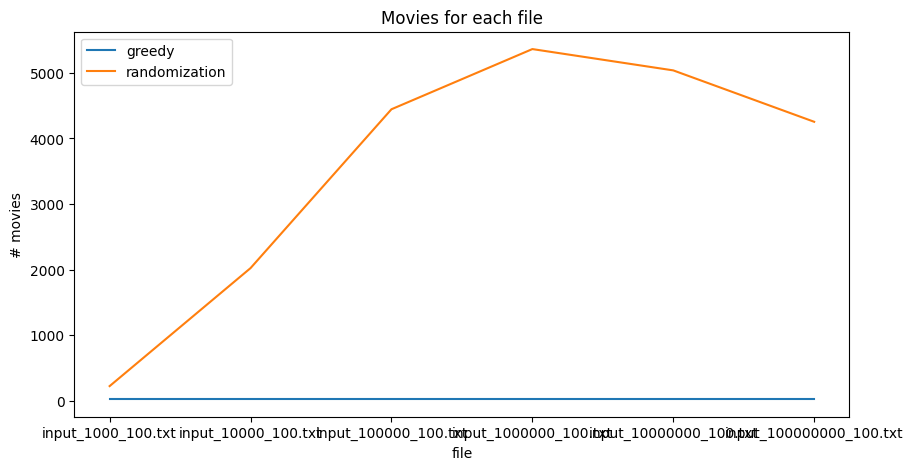

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))

for algorithm in df_mean_movies['algorithm'].unique():
    df_aux = df_mean_movies[df_mean_movies['algorithm'] == algorithm]
    ax.plot(df_aux['file'], df_aux['memoria'], label=algorithm)

ax.set_title('Movies for each file')
ax.set_xlabel('file')
ax.set_ylabel('# movies')
ax.legend()
plt.show()

No gráfico que mostra a relação entre o número de filmes no input e a estratégia utilizada para a resolução do problema da Mochila de Filmes, é possível observar que a estratégia gulosa apresenta uma vantagem significativa em cenários com maior quantidade de filmes. Isso se deve ao fato de que a estratégia gulosa percorre todos os filmes disponíveis para selecionar os que melhor se encaixam na Mochila de Filmes. Por outro lado, a abordagem aleatória escolhe um filme aleatoriamente e tenta inseri-lo na mochila, sem necessariamente considerar todos os outros filmes disponíveis.

## Segundo passo: número de filmes constante

### Utilizaremos um número constante (10000) de filmes. Os arquivos estão presentes na pasta input_files2

Seguindo a mesma lógica do primeiro passo, teremos:

In [12]:
import time
import subprocess

algorithms = ['greedy', 'randomization']
file_sizes = ['input_10000_1.txt', 'input_10000_5.txt', 'input_10000_10.txt', 'input_10000_25.txt', 'input_10000_50.txt', 'input_10000_100.txt']

data2 = {algo: {file: {'tempo': [], 'memoria': []} for file in file_sizes} for algo in algorithms}

def number_of_movies(file):
    with open(file, 'r') as f:
        line = f.readline().split()
        return int(line[0])
    
for algorithm, files in data2.items():
    for file_name, measurements in files.items():
        for i in range(10):
            print(f"{algorithm} - {file_name} - {i+1}/10")
            output_name = f"{i}_{file_name.split('.')[0]}"
            start_time = time.time()
            subprocess.run(f'./{algorithm} < input_files2/{file_name} > output_files2/{algorithm}_output_{output_name}', shell=True)
            #!./{algorithm} < input_files/{file_name} > output_files/{algorithm}_output_{output_name}
            end_time = time.time() - start_time
            print(f"\tTime: {end_time}")
            measurements["tempo"].append(end_time)
            measurements["memoria"].append(number_of_movies(f"output_files2/{algorithm}_output_{output_name}"))

greedy - input_10000_1.txt - 1/10
	Time: 0.011146306991577148
greedy - input_10000_1.txt - 2/10
	Time: 0.009865760803222656
greedy - input_10000_1.txt - 3/10
	Time: 0.009716510772705078
greedy - input_10000_1.txt - 4/10
	Time: 0.009814739227294922
greedy - input_10000_1.txt - 5/10
	Time: 0.009399652481079102
greedy - input_10000_1.txt - 6/10
	Time: 0.009290933609008789
greedy - input_10000_1.txt - 7/10
	Time: 0.009261846542358398
greedy - input_10000_1.txt - 8/10
	Time: 0.010185956954956055
greedy - input_10000_1.txt - 9/10
	Time: 0.00957345962524414
greedy - input_10000_1.txt - 10/10
	Time: 0.009387969970703125
greedy - input_10000_5.txt - 1/10
	Time: 0.009261846542358398
greedy - input_10000_5.txt - 2/10
	Time: 0.009523153305053711
greedy - input_10000_5.txt - 3/10
	Time: 0.009776592254638672
greedy - input_10000_5.txt - 4/10
	Time: 0.009855985641479492
greedy - input_10000_5.txt - 5/10
	Time: 0.010141134262084961
greedy - input_10000_5.txt - 6/10
	Time: 0.009836673736572266
greedy -

Agora vamos salvar no json

In [13]:
import json

with open('data2.json', 'w') as fp:
    json.dump(json.dumps(data2, indent=2), fp)

Gerando o df pra ser usado no gráfico

In [14]:
import pandas as pd

df2 = pd.DataFrame(columns=['algorithm', 'file', 'iteration', 'tempo', 'memoria'])

for algorithm in data2:
    for arquivo in data2[algorithm]:
        for i in range(10):
            df2 = pd.concat([df2, pd.DataFrame({
                'algorithm': [algorithm],
                'file': [arquivo],
                'iteration': [i+1],
                'tempo': [data2[algorithm][arquivo]['tempo'][i]],
                'memoria': [data2[algorithm][arquivo]['memoria'][i]]
            })])

df2

,algorithm,file,iteration,tempo,memoria
0,greedy,input_10000_1.txt,1,0.011146,1
0,greedy,input_10000_1.txt,2,0.009866,1
0,greedy,input_10000_1.txt,3,0.009717,1
0,greedy,input_10000_1.txt,4,0.009815,1
0,greedy,input_10000_1.txt,5,0.009400,1
...,...,...,...,...,...
0,randomization,input_10000_100.txt,6,0.013605,2007
0,randomization,input_10000_100.txt,7,0.013880,2007
0,randomization,input_10000_100.txt,8,0.013065,2007
0,randomization,input_10000_100.txt,9,0.015186,2007


In [15]:
df2.to_csv('data2.csv', index=False)

### Gŕafico de tempo


In [16]:
df_mean2 = df2.groupby(['algorithm', 'file']).mean(numeric_only=True).reset_index()
df_mean2.sort_values(by=['tempo'], inplace=True)

In [17]:
df_mean2

,algorithm,file,tempo
4,greedy,input_10000_5.txt,0.009656
0,greedy,input_10000_1.txt,0.009764
1,greedy,input_10000_10.txt,0.009990
6,randomization,input_10000_1.txt,0.010031
2,greedy,input_10000_100.txt,0.010324
5,greedy,input_10000_50.txt,0.010389
3,greedy,input_10000_25.txt,0.010541
9,randomization,input_10000_25.txt,0.011952
11,randomization,input_10000_50.txt,0.012111
7,randomization,input_10000_10.txt,0.012159


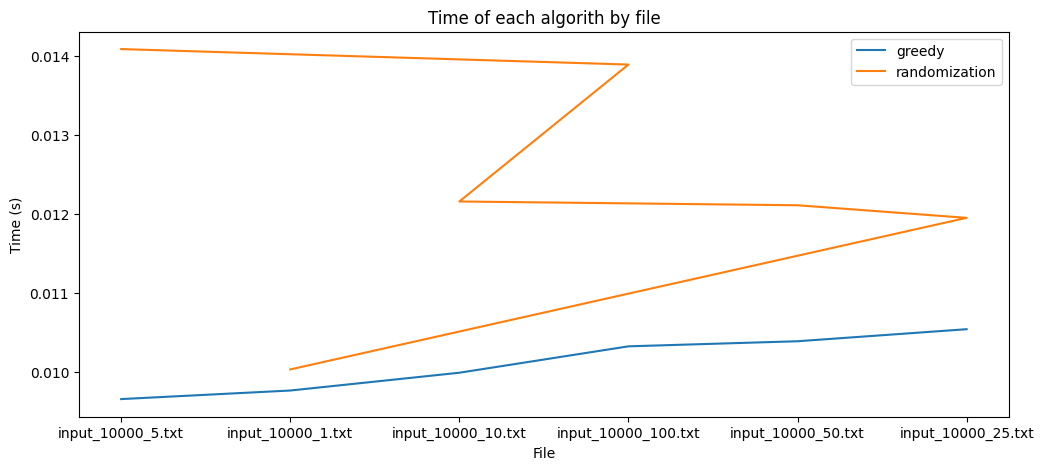

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))
for algorithm in df_mean2['algorithm'].unique():
    df_aux2 = df_mean2[df_mean2['algorithm'] == algorithm]
    ax.plot(df_aux2['file'], df_aux2['tempo'], label=algorithm)

ax.set_title('Time of each algorith by file')
ax.set_xlabel('File')
ax.set_ylabel('Time (s)')
ax.legend()
plt.show()

considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações 

### Gráfico de filmes por input


In [19]:
df_mean_movies2 = df2.drop(columns=['tempo','iteration'])
df_mean_movies2 = df_mean_movies2.groupby(['algorithm', 'file']).mean().reset_index()
order_files2 = list(data2['greedy'].keys())

df_mean_movies2['file'] = pd.Categorical(df_mean_movies2['file'], categories=order_files2, ordered=True)
df_mean_movies2 = df_mean_movies2.sort_values(by=['file'])



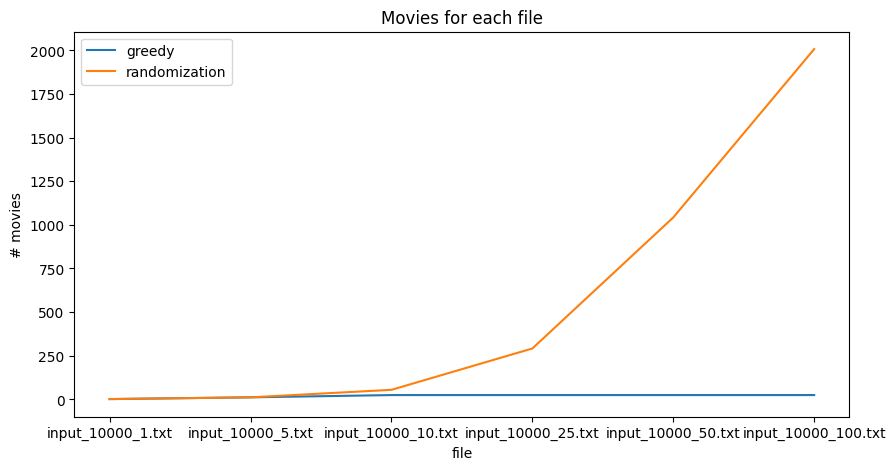

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))

for algorithm in df_mean_movies2['algorithm'].unique():
    df_aux2 = df_mean_movies2[df_mean_movies2['algorithm'] == algorithm]
    ax.plot(df_aux2['file'], df_aux2['memoria'], label=algorithm)

ax.set_title('Movies for each file')
ax.set_xlabel('file')
ax.set_ylabel('# movies')
ax.legend()
plt.show()

considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações 

## considerações finais

considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações considerações 